In [88]:
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

## APT stands for 'advanced persistent threat', a fancy word for 'hackers who have lots of money thrown at them and lots of time on their hands and most of their targets seem to be in sync with what their respective governments would love to have more information about.'
- sort of.


## A paragraph or two about the work you've done
- I've known about this dataset for quite some while and had conversations with the guy who created it (@cyb3rops) about the methodology. I've talked with people – government officials and hackers working in private firms – if they find the dataset to be plausible. Most of them did. I included the dataset in an article I wrote, but always thought it'd be interesting to revisit the findings and look through the dataset again.

## A paragraph or two about your findings
- Although everybody is speaking about hacker-groups that are – allegedly – working for the russian government, china has far more (active question mark) hacker groups. 
- You can clearly see that there are groups everybody is talking about (because it gives them good and easy press coverage)

## Limitations
- There are next to no reports about hacker groups from Western countries. Guess why!
- Without knowing how these hacker groups are tied to their respective governments, this chart is easy to consume, but mostly meaningless.


## A list of additional "nice to have" improvements 
- further data analysis
- Kaspersky has seen their business essentially being wiped away by the US government, so it'd be interesting to see how many reports they put out there versus other companies

In [ ]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [649]:
china_hackers = pd.read_excel('APT Groups and Operations.xlsx', sheet_name=1, header=1)
china_hackers.head()

,Common Name,CrowdStrike,IRL,Kaspersky,Secureworks,Mandiant,FireEye,Symantec,iSight,Cisco (Sourcefire/VRT > Talos),...,Link 4,Link 5,Link 6,Link 7,Link 8,Link 9,Link 10,Link 11,Link 12,Link 13
0,Comment Crew,Comment Panda,PLA Unit 61398,NaN,TG-8223,APT 1,NaN,NaN,BrownFox,Group 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,APT 2,Putter Panda,PLA Unit 61486,NaN,TG-6952,APT 2,NaN,NaN,NaN,Group 36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UPS,Gothic Panda,NaN,NaN,TG-0110,APT 3,NaN,Buckeye,UPS Team,Group 6,...,https://intrusiontruth.wordpress.com/2017/05/0...,https://www.fireeye.com/current-threats/apt-gr...,https://www.recordedfuture.com/chinese-mss-beh...,http://freebeacon.com/national-security/u-s-in...,https://www.washingtonpost.com/world/national-...,NaN,NaN,NaN,NaN,NaN
3,IXESHE,Numbered Panda,NaN,NaN,TG-2754 (tentative),APT 12,BeeBus,NaN,Calc Team,Group 22,...,http://www.secureworks.com/cyber-threat-intell...,http://blog.trendmicro.com/taking-a-bite-out-o...,http://www.arbornetworks.com/asert/2014/06/ill...,https://cysinfo.com/sx-2nd-meetup-reversing-an...,http://blog.macnica.net/blog/2017/08/post-fb81...,NaN,NaN,NaN,NaN,NaN
4,APT 16,NaN,NaN,NaN,NaN,APT 16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [650]:
china_hackers.rename(columns={'Cisco (Sourcefire/VRT > Talos)': 'Talos'}, inplace=True)
china_hackers.head(1)

,Common Name,CrowdStrike,IRL,Kaspersky,Secureworks,Mandiant,FireEye,Symantec,iSight,Talos,...,Link 4,Link 5,Link 6,Link 7,Link 8,Link 9,Link 10,Link 11,Link 12,Link 13
0,Comment Crew,Comment Panda,PLA Unit 61398,NaN,TG-8223,APT 1,NaN,NaN,BrownFox,Group 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [651]:
[colname for colname in china_hackers.columns if 'Link' not in colname]
chinese_df = china_hackers[china_hackers.columns[:11]]
chinese_df.head(1)

,Common Name,CrowdStrike,IRL,Kaspersky,Secureworks,Mandiant,FireEye,Symantec,iSight,Talos,Palo Alto Unit 42
0,Comment Crew,Comment Panda,PLA Unit 61398,NaN,TG-8223,APT 1,NaN,NaN,BrownFox,Group 3,NaN


In [652]:
df_china = pd.melt(chinese_df, id_vars='Common Name', var_name='firm', value_name='firm_name')
df_china.head(1)

,Common Name,firm,firm_name
0,Comment Crew,CrowdStrike,Comment Panda


In [ ]:
chinese_grouped = df_china.groupby('firm').count()
chinese_grouped.plot(kind='barh', y=['Common Name', 'firm_name'])
#[df_china.firm == 'CrowdStrike'].firm_name.isna().value_counts()


In [653]:
chinese_grouped.head(1)

,Common Name,firm_name,apt_reports
firm,,,
CrowdStrike,76,39,37


In [654]:
chinese_grouped['apt_reports'] = chinese_grouped['Common Name']-chinese_grouped['firm_name']
chinese_grouped = chinese_grouped.astype('int64')
chinese_grouped.head(1)

,Common Name,firm_name,apt_reports
firm,,,
CrowdStrike,76,39,37


In [630]:
plt.rcParams.update({
#    'pdf.fonttype': 42,
#    'ps.fonttype': 42,
    'figure.facecolor': '#deebf7'
})

In [535]:
#for index in chinese_grouped.index.values:
#    print(index)
#print(chinese_grouped.index.values)

['CrowdStrike' 'FireEye' 'IRL' 'Kaspersky' 'Mandiant' 'Palo Alto Unit 42'
 'Secureworks' 'Symantec' 'Talos' 'iSight']


/Users/hatr/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


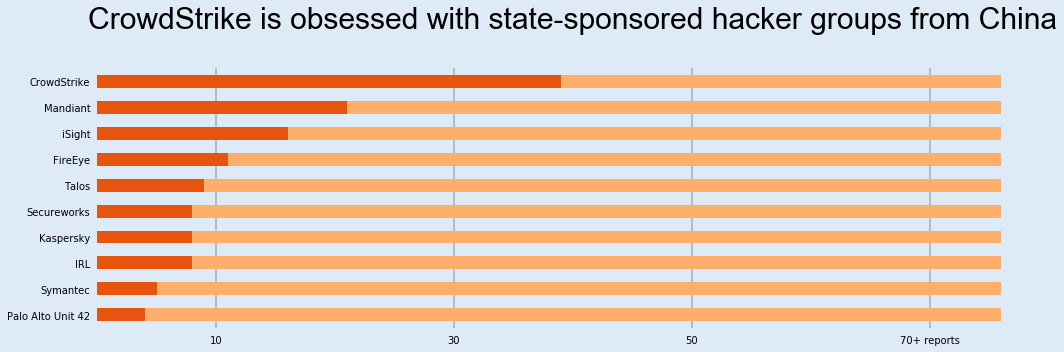

In [631]:
ax = chinese_grouped.reset_index().sort_values(by='apt_reports', ascending=False).plot(kind='barh', color=bar_coloring, x='firm', y=['firm_name','apt_reports'], stacked=True, legend=False, figsize=(15,5))
ax.set_title('CrowdStrike is obsessed with state-sponsored hacker groups from China', pad=40)
ax.title.set_fontsize(30)
ax.title.set_fontname('Arial Unicode MS')
ax.set_xticks([10, 30, 50, 70])
ax.set_xticklabels([10, 30, 50, '70+ reports'])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)

ax.tick_params(which='both', left=False, bottom=False)
ax.grid(True, axis ='x', color='black', linestyle='-', linewidth=0.4)
ax.set_axisbelow(True)
ax.set_xlim(0,80)
ax.set_facecolor('#deebf7')
plt.savefig('Crowdstrike.pdf', facecolor=fig.get_facecolor())


In [469]:
for firm in chinese_grouped.reset_index().firm:
    print(firm)

CrowdStrike
FireEye
IRL
Kaspersky
Mandiant
Palo Alto Unit 42
Secureworks
Symantec
Talos
iSight


In [517]:
#bar_color = []
#bar_colors_1 = ['#7fcdbb', '#efedf5']
#bar_colors_2 = ['red', 'pink']
#bar_color.append(bar_colors_1)
#bar_color.append(bar_colors_2)
#
#color_dict = {
#    'CrowdStrike': bar_color[0],
#    'Mandiant': bar_color[1],
#    'iSight': bar_color[1],
#    'FireEye': bar_color[1],
#    'Talos': bar_color[1],
#    'Secureworks': bar_color[1],
#    'Kaspersky': bar_color[1],
#    'IRL': bar_color[1],
#    'Symantec': bar_color[1],
#    'Palo Alto Unit 42': bar_color[1]
#}
#
#bar_colors = [color_dict[firm] for firm in chinese_grouped.reset_index().firm]
#ax = chinese_grouped.reset_index().sort_values(by='apt_reports', ascending=False).plot(kind='barh', color=bar_colors, x='firm', y=['firm_name','apt_reports'], stacked=True, legend=False, figsize=(15,5))

In [655]:
russia_hackers = pd.read_excel('APT Groups and Operations.xlsx', sheet_name=2, header=1, index_col=0)
russia_hackers.head(1)

,Other Name 1,Other Name 2,Other Name 3,Other Name 4,Other Name 5,Other Name 6,Other Name 7,Other Name 8,Other Name 9,Other Name 10,...,Link 10,Link 11,Link 12,Link 13,Link 14,Link 15,Link 16,Link 17,Link 18,Link 19
Common Name,,,,,,,,,,,,,,,,,,,,,
Sofacy,APT 28,Sednit,Pawn Storm,Group 74,Tsar Team,Fancy Bear,Strontium,Swallowtail,SIG40,NaN,...,http://researchcenter.paloaltonetworks.com/201...,http://www.welivesecurity.com/2016/10/20/new-e...,https://www.crowdstrike.com/blog/danger-close-...,https://www.us-cert.gov/sites/default/files/pu...,https://www.us-cert.gov/sites/default/files/pu...,http://blog.talosintelligence.com/2017/10/cybe...,https://apnews.com/3bca5267d4544508bb523fa0db4...,https://blog.trendmicro.com/trendlabs-security...,https://researchcenter.paloaltonetworks.com/20...,NaN


In [656]:
russia_hackers.rename(index={'GRU GTsST (Main Center for Special Technology)': 'GRU', 'FSB 16th & 18th Centers': 'FSB'}, inplace=True)
russia_hackers.head(1)

,Other Name 1,Other Name 2,Other Name 3,Other Name 4,Other Name 5,Other Name 6,Other Name 7,Other Name 8,Other Name 9,Other Name 10,...,Link 10,Link 11,Link 12,Link 13,Link 14,Link 15,Link 16,Link 17,Link 18,Link 19
Common Name,,,,,,,,,,,,,,,,,,,,,
Sofacy,APT 28,Sednit,Pawn Storm,Group 74,Tsar Team,Fancy Bear,Strontium,Swallowtail,SIG40,NaN,...,http://researchcenter.paloaltonetworks.com/201...,http://www.welivesecurity.com/2016/10/20/new-e...,https://www.crowdstrike.com/blog/danger-close-...,https://www.us-cert.gov/sites/default/files/pu...,https://www.us-cert.gov/sites/default/files/pu...,http://blog.talosintelligence.com/2017/10/cybe...,https://apnews.com/3bca5267d4544508bb523fa0db4...,https://blog.trendmicro.com/trendlabs-security...,https://researchcenter.paloaltonetworks.com/20...,NaN


In [657]:
filtered_columns = [colname for colname in russia_hackers.columns if 'Link' not in colname]
russia_df = russia_hackers[filtered_columns[:14]]
russia_df.head(1)

,Other Name 1,Other Name 2,Other Name 3,Other Name 4,Other Name 5,Other Name 6,Other Name 7,Other Name 8,Other Name 9,Other Name 10,Other Name 11,Other Name 12,Secureworks,Operation 1
Common Name,,,,,,,,,,,,,,
Sofacy,APT 28,Sednit,Pawn Storm,Group 74,Tsar Team,Fancy Bear,Strontium,Swallowtail,SIG40,NaN,NaN,NaN,IRON TWILIGHT,Russian Doll


/Users/hatr/.pyenv/versions/3.6.3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


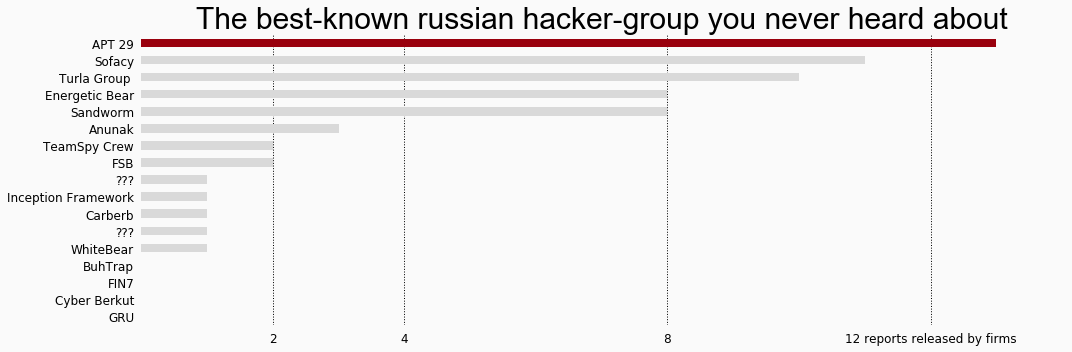

In [648]:
bar_color_r = ['#d9d9d9', '#d9d9d9', '#d9d9d9', '#f0f0f0', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#d9d9d9', '#99000d']
ax = russia_df.count(axis='columns').sort_values().plot(kind='barh',  y="Common Name", color=bar_color_r, legend=False, fontsize=12, figsize=(15,5))
ax.set_title('The best-known russian hacker-group you never heard about')
ax.title.set_fontsize(30)
ax.title.set_fontname('Arial Unicode MS')
ax.set_xticks([2, 4, 8, 12])
ax.set_xticklabels([2, 4, 8, '12 reports released by firms'])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)

ax.tick_params(which='both', left=False, bottom=False)
ax.grid(True, axis ='x', color='black', linestyle=':', linewidth=1)
ax.set_axisbelow(True)
ax.set_xlim(0,14)
ax.set_facecolor('#fafafa')
plt.savefig('APT29.pdf', facecolor='#fafafa')


In [638]:
plt.rcParams.update({
    'figure.facecolor': '#fafafa'

})

In [658]:
#def count_reports(counted):
#    for count in russia_df.count(axis='columns').sort_values():
#        if count > 12:
#            return 'coral'
#        else:
#            return 'grey'
#color_scheme = [count for count in russia_df.count(axis='columns').sort_values()]
#
#ax = russia_df.count(axis='columns').sort_values().plot(kind='barh',  y="Common Name", color=color_scheme, legend=False, fontsize=12, figsize=(15,5))